Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2018/2019
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 26. listopada 2018.*

(c) 2015-2018 Jan Šnajder, Domagoj Alagić  

Objavljeno: **26. listopada 2018.**  
Rok za predaju: **5. studenog 2018. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

1.0


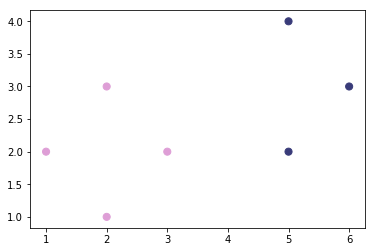

In [4]:
clf = RidgeClassifier().fit(seven_X, seven_y)
predicted_y = clf.predict(seven_X)
score = accuracy_score(y_pred=predicted_y, y_true=seven_y)
print(score)

mlutils.plot_2d_clf_problem(X=seven_X, y=predicted_y, h=None)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

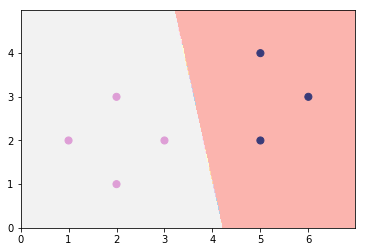

In [5]:

lr = LinearRegression().fit(seven_X, seven_y)
predicted_y_2 = lr.predict(seven_X)


mlutils.plot_2d_clf_problem(X=seven_X, y=seven_y, h= lambda x : lr.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [6]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

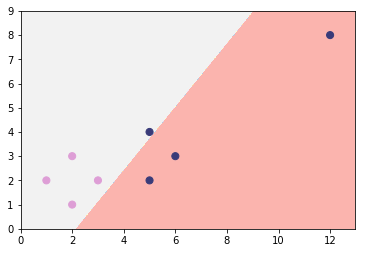

In [7]:
lr2 = LinearRegression().fit(outlier_X, outlier_y)
predicted_y_2 = lr2.predict(outlier_X)

mlutils.plot_2d_clf_problem(X=outlier_X, y=outlier_y, h= lambda x : lr2.predict(x) >= 0.5)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [8]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

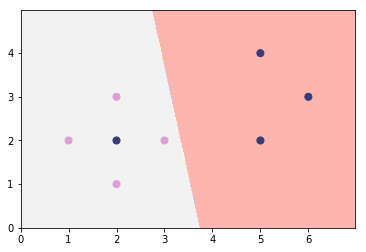

In [9]:
lr3 = LinearRegression().fit(unsep_X, unsep_y)
predicted_y_2 = lr3.predict(unsep_X)

mlutils.plot_2d_clf_problem(X=unsep_X, y=unsep_y, h= lambda x : lr3.predict(x) >= 0.5)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

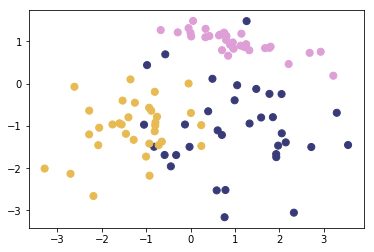

In [10]:
from sklearn.datasets import make_classification

x, y = sklearn.datasets.make_classification(n_samples=100, n_informative=2, n_redundant=0, n_repeated=0, n_features=2, n_classes=3, n_clusters_per_class=1)

#print(dataset)
mlutils.plot_2d_clf_problem(X=x, y=y, h=None)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

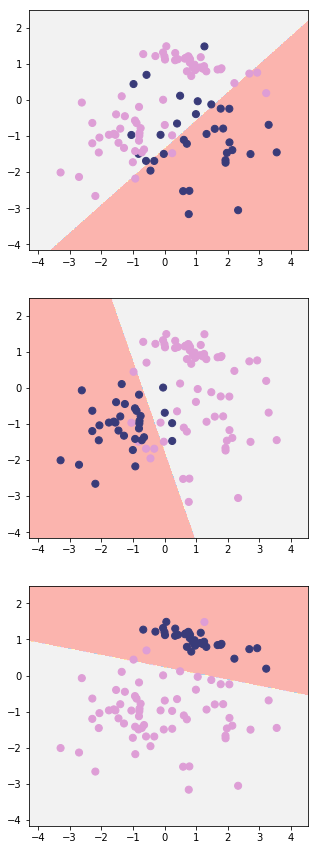

In [11]:
fig = plt.figure(figsize=(5,15))
fig.subplots_adjust(wspace=0.2)

y_ovo1 = [ 0 if i == 0 else 1 for i in y]
lrOvo1 = LinearRegression().fit(x, y_ovo1)
fig.add_subplot(3,1,1)
mlutils.plot_2d_clf_problem(X=x, y=y_ovo1, h= lambda x : lrOvo1.predict(x) >= 0.5)

y_ovo2 = [ 0 if i == 1 else 1 for i in y]
lrOvo2 = LinearRegression().fit(x, y_ovo2)
fig.add_subplot(3,1,2)
mlutils.plot_2d_clf_problem(X=x, y=y_ovo2, h= lambda x : lrOvo2.predict(x) >= 0.5)

y_ovo3 = [ 0 if i == 2 else 1 for i in y]
lrOvo3 = LinearRegression().fit(x, y_ovo3)
fig.add_subplot(3,1,3)
mlutils.plot_2d_clf_problem(X=x, y=y_ovo3, h= lambda x : lrOvo3.predict(x) >= 0.5)



### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

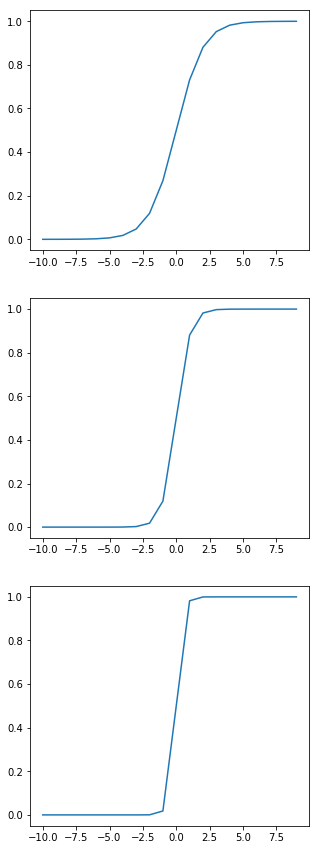

In [12]:
def sigm(alpha):
    def f(x):
        return 1 / (1 + exp(-alpha*x))
        
    return f

ax = list(range(-10, 10))
ay1 = list(map(sigm(1), ax))
ay2 = list(map(sigm(2), ax))
ay3 = list(map(sigm(4), ax))

fig = plt.figure(figsize=(5,15))
p1 = fig.add_subplot(3, 1, 1)
p1.plot(ax, ay1)
p2 = fig.add_subplot(3, 1, 2)
p2.plot(ax, ay2)
p3 = fig.add_subplot(3, 1, 3)
p3.plot(ax, ay3)


**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [13]:
from sklearn.preprocessing import PolynomialFeatures as PolyFeat
from sklearn.metrics import log_loss

def loss_function(h_x, y):
    return -y * np.log(h_x) - (1 - y) * np.log(1 - h_x)

def lr_h(x, w):
    Phi = PolyFeat(1).fit_transform(x.reshape(1,-1))
    return sigm(1)(Phi.dot(w))
    
def cross_entropy_error(X, y, w):
    Phi = PolyFeat(1).fit_transform(X)
    return log_loss(y, sigm(1)(Phi.dot(w)))


def lr_train(X, y, eta = 0.01, max_iter = 2000, alpha = 0, epsilon = 0.0001, trace= False):
    w = zeros(shape(X)[1] + 1)
    N = len(X)
    w_trace = [];
    error = epsilon**-1
    
    for i in range(0, max_iter):
        dw0 = 0; dw = zeros(shape(X)[1]);
        new_error = 0
        
        for j in range(0, N):
            h = lr_h(X[j], w)
            dw0 += h - y[j]
            dw += (h - y[j])*X[j]
            
            new_error += loss_function(h, y[j])

        if abs(error - new_error) < epsilon: 
            print('stagnacija na i = ', i)
            break
        
        else: error = new_error
            
        w[0] -= eta*dw0
        w[1:] = w[1:] * (1-eta*alpha) - eta*dw
        
        w_trace.extend(w)
        
    if trace:
        return w, w_trace
        
    else: return w
    


#### (c)


Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

0.07751718252492557
[ 6.44150959 -2.11012128  0.53522851]


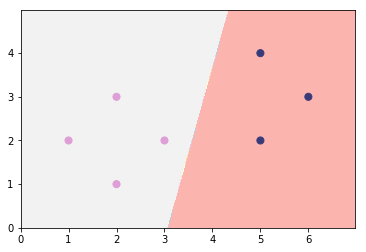

In [14]:
trained = lr_train(seven_X, seven_y)
print(cross_entropy_error(seven_X, seven_y, trained))
print(trained)

h3c = lambda x: lr_h(x, trained) > 0.5

figure()
mlutils.plot_2d_clf_problem(seven_X, seven_y, h3c)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

stagnacija na i =  1544
stagnacija na i =  1128


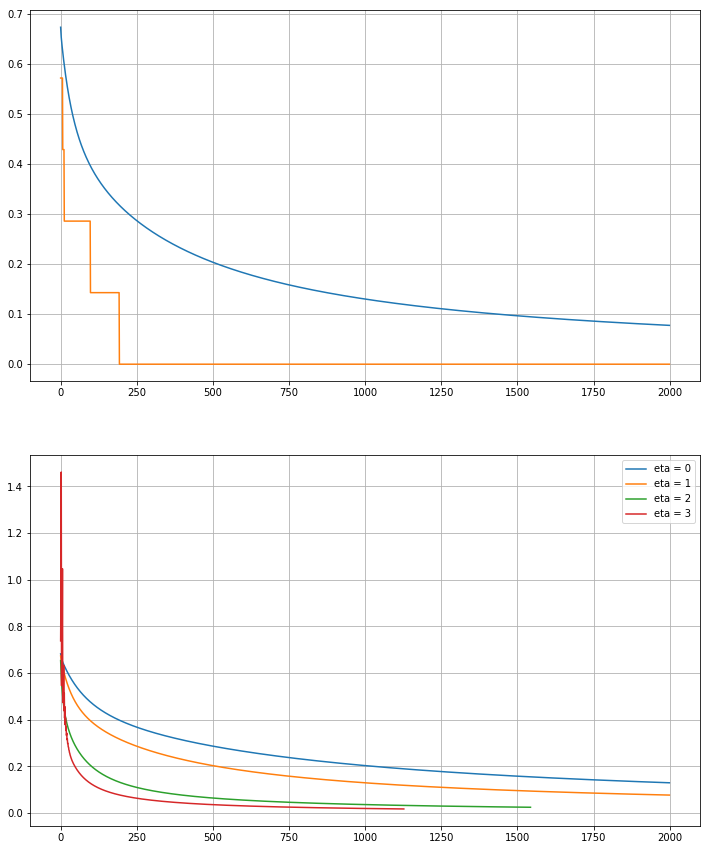

In [15]:
from sklearn.metrics import zero_one_loss

eta = [0.005, 0.01, 0.05, 0.1]
[w3d, w3d_trace] = lr_train(seven_X, seven_y, trace=True)


Phi = PolyFeat(1).fit_transform(seven_X)
h_3d = lambda x: x >= 0.5

error_unakrs = []
errror_classy = []
errror_eta = []

for k in range(0, len(w3d_trace), 3):
    error_unakrs.append(cross_entropy_error(seven_X, seven_y, w3d_trace[k:k+3]))
    errror_classy.append(zero_one_loss(seven_y, h_3d(sigm(1)(Phi.dot(w3d_trace[k:k+3])))))
    
for i in eta:
    err = []
    [w3, w3_trace] = lr_train(seven_X, seven_y, i, trace=True)
    
    for j in range(0, len(w3_trace), 3):
        err.append(cross_entropy_error(seven_X, seven_y, w3_trace[j:j+3]))
    
    errror_eta.append(err)
    
figure(figsize(12, 15))
subplots_adjust(wspace=0.1)
subplot(2,1,1)
grid()
plot(error_unakrs); plot(errror_classy);

subplot(2,1,2)
grid()
for i in range(0, len(eta)):
    plot(errror_eta[i], label = 'eta = ' + str(i))
legend(loc = 'best');


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

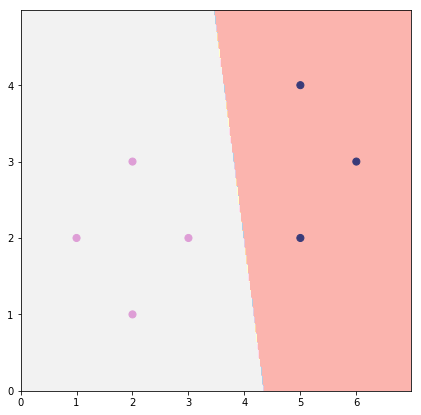

In [16]:
from sklearn.linear_model import LogisticRegression

reg3e = LogisticRegression(max_iter=2000, tol=0.0001, C=0.01**-1, solver='lbfgs').fit(seven_X,seven_y)
h3e = lambda x : reg3e.predict(x)

figure(figsize(7, 7))
mlutils.plot_2d_clf_problem(seven_X,seven_y, h3e)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

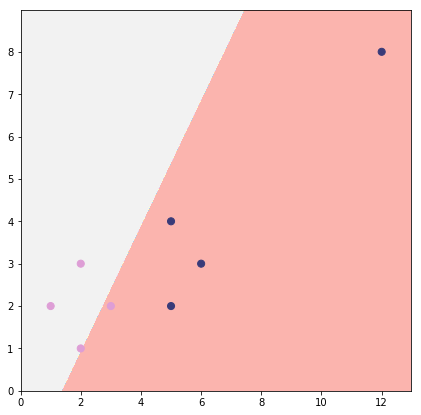

In [17]:
    logReg4 = LogisticRegression(solver='liblinear').fit(outlier_X, outlier_y)
    mlutils.plot_2d_clf_problem(X=outlier_X, y=outlier_y, h= lambda x : logReg4.predict(x) >= 0.5)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.
    

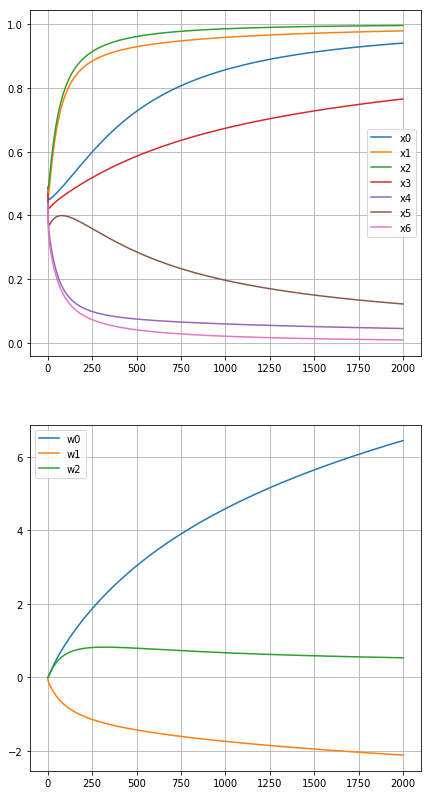

In [18]:
[w4b, w4b_trace] = lr_train(seven_X, seven_y, trace = True)

w0_4b = []; w1_4b = []; w2_4b = [];

for i in range(0, len(w4b_trace), 3):
    w0_4b.append(w4b_trace[i])
    w1_4b.append(w4b_trace[i+1])
    w2_4b.append(w4b_trace[i+2])
    
h_gl = []

for i in range(0, len(seven_X)):
    h = []

    for j in range(0, len(w4b_trace), 3):
        h.append(lr_h(seven_X[i], w4b_trace[j:j+3]))
        
    h_gl.append(h)


figure(figsize(7, 14))
subplot(2,1,1)
grid()
for i in range(0, len(h_gl)):
    plot(h_gl[i], label = 'x' + str(i))

legend(loc = 'best') ;
    
subplot(2,1,2)
grid()
plot(w0_4b); plot(w1_4b); plot(w2_4b);
legend(['w0', 'w1', 'w2'], loc = 'best');
      

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

stagnacija na i =  1315


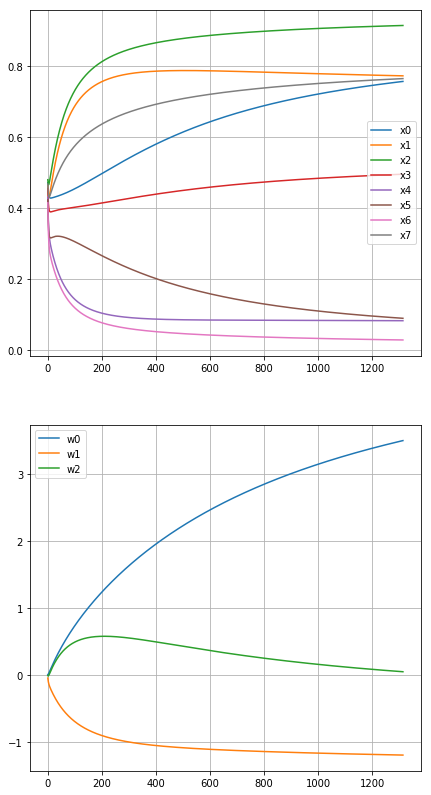

In [19]:
unsep_y = np.append(seven_y, 0)
[w4c, w4c_trace] = lr_train(unsep_X, unsep_y, trace = True)

w0_4c = []; w1_4c = []; w2_4c = [];

for i in range(0, len(w4c_trace), 3):
    w0_4c.append(w4c_trace[i])
    w1_4c.append(w4c_trace[i+1])
    w2_4c.append(w4c_trace[i+2])
    
h_gl = []

for i in range(0, len(unsep_X)):
    h = []

    for j in range(0, len(w4c_trace), 3):
        h.append(lr_h(unsep_X[i], w4c_trace[j:j+3]))
        
    h_gl.append(h)
    

figure(figsize(7, 14))
subplots_adjust(wspace=0.1)
subplot(2,1,1)
grid()
for i in range(0, len(h_gl)):
    plot(h_gl[i], label = 'x' + str(i))

legend(loc = 'best') ;
    
subplot(2,1,2)
grid()
plot(w0_4c); plot(w1_4c); plot(w2_4c);
legend(['w0', 'w1', 'w2'], loc = 'best');


### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [20]:
from numpy.linalg import norm

stagnacija na i =  772
stagnacija na i =  230


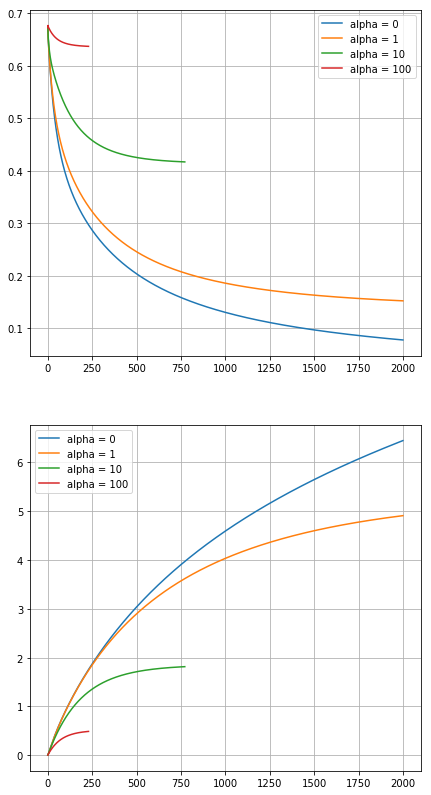

In [21]:
alpha5 = [0, 1, 10, 100]

err_gl = []; norm_gl = [];

for a in alpha5:
    [w5, w5_trace] = lr_train(seven_X, seven_y, alpha = a, trace = True)
    err = []; L2_norm = [];
    
    for k in range(0, len(w5_trace), 3):
        err.append(cross_entropy_error(seven_X, seven_y, w5_trace[k:k+3]))
        L2_norm.append(linalg.norm(w5_trace[k:k+1]))
    
    err_gl.append(err)
    norm_gl.append(L2_norm)
    
figure(figsize(7, 14))
subplot(2,1,1)
grid()
for i in range(0, len(err_gl)):
    plot(err_gl[i], label = 'alpha = '  + str(alpha5[i])  )
    
legend(loc = 'best') ;

subplot(2,1,2)
grid()
for i in range(0, len(err_gl)):
    plot(norm_gl[i], label = 'alpha = ' + str(alpha5[i]) )
    
legend(loc = 'best');


    

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

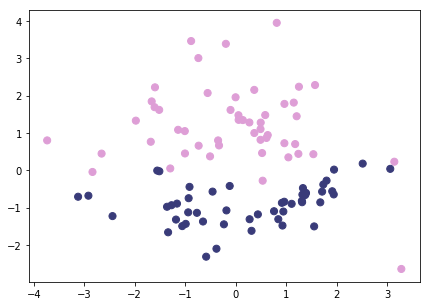

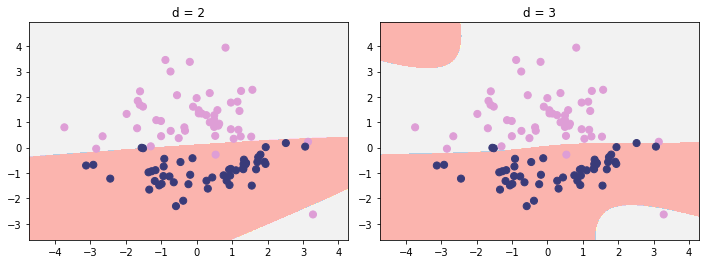

In [22]:
from sklearn.preprocessing import PolynomialFeatures

[x6, y6] = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)

figure(figsize(7, 5))
mlutils.plot_2d_clf_problem(x6, y6)

d = [2,3]
j = 1
figure(figsize(12, 4))
subplots_adjust(wspace=0.1)
for i in d:
    subplot(1,2,j)
    poly = PolynomialFeatures(i)
    Phi = poly.fit_transform(x6)

    model = LogisticRegression(solver='lbfgs')
    model.fit(Phi, y6)
    h = lambda x : model.predict(poly.transform(x))

    mlutils.plot_2d_clf_problem(x6, y6, h)
    title('d = ' + str(i))
    j += 1


In [23]:
# Vaš kôd ovdje...

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?